In [29]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:


# ler e cria dataframe dos arquivos csv
df_db_operacoes = pd.read_csv('db_credito.operacoes_1_(1).csv', sep=';')
df_db_faixa_risco = pd.read_csv('db_credito.faixas_risco_1_(1).csv', sep=';', encoding='latin1')

# ler arquivo xlsx
df_dados_case = pd.read_excel('dados_case_analista_dados_1_(1).xlsx', sheet_name='DADOS')



Distribuição de renda dos aposentados:
             RENDA_CAT Proporção_formatada
 ENTRE R$1000 E R$2500              64.01%
            ATÉ R$1000              16.41%
 ENTRE R$2500 E R$5000              12.30%
ENTRE R$5000 E R$10000               4.75%
      ACIMA DE R$10000               2.53%




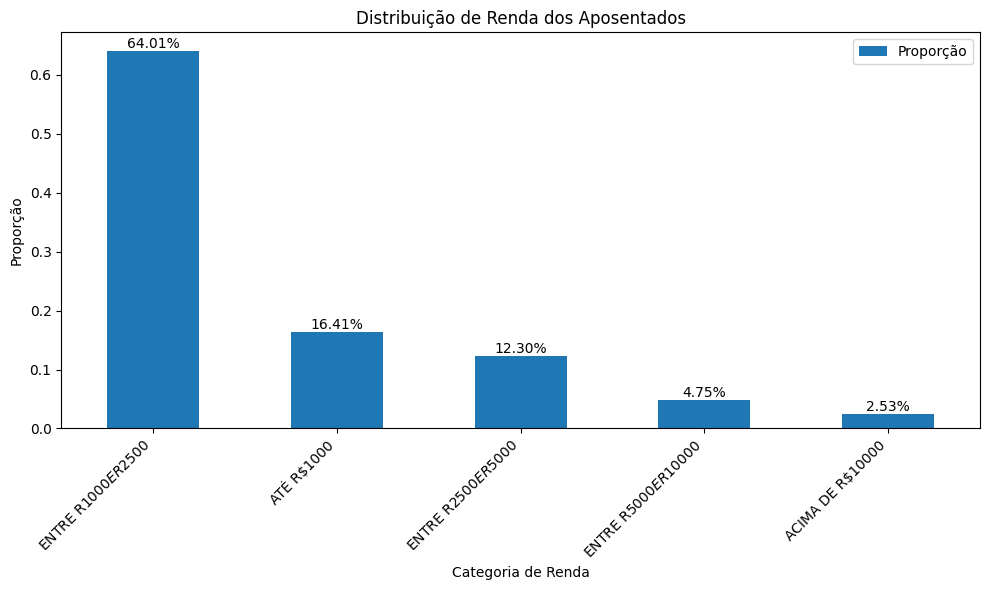

In [31]:

# Filtrar aposentados e beneficiários do INSS
aposentados = df_dados_case[df_dados_case['DESC_CBO'] == 'Aposentados e beneficiários do inss']

# Distribuição de renda dos aposentados
distribuicao_renda = aposentados['RENDA_CAT'].value_counts(normalize=True).reset_index()
distribuicao_renda.columns = ['RENDA_CAT', 'Proporção']

# Criar uma coluna formatada para exibição
distribuicao_renda['Proporção_formatada'] = distribuicao_renda['Proporção'].apply(lambda x: f"{x:.2%}")

print("Distribuição de renda dos aposentados:")
print(distribuicao_renda[['RENDA_CAT', 'Proporção_formatada']].to_string(index=False))
print("\n")

# Plotar o gráfico
plt.figure(figsize=(10, 6))
distribuicao_renda.plot(kind='bar', x='RENDA_CAT', y='Proporção', ax=plt.gca())
plt.title('Distribuição de Renda dos Aposentados')
plt.xlabel('Categoria de Renda')
plt.ylabel('Proporção')
plt.xticks(rotation=45, ha='right')

# Adicionar rótulos de porcentagem nas barras
for i, v in enumerate(distribuicao_renda['Proporção']):
    plt.text(i, v, f'{v:.2%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def limpar_e_converter(serie):
    if pd.api.types.is_numeric_dtype(serie):
        return serie
    return pd.to_numeric(serie.replace({'S': 1, 'N': 0, 'SN': np.nan}), errors='coerce')

def analise_completa_sicredi(renda_cat):
    print(f"Análise para categoria de renda: {renda_cat}")
    
    aposentados_filtrados = aposentados[aposentados['RENDA_CAT'] == renda_cat]
    
    # 1. Análise de Produtos e Serviços
    produtos_servicos = [
        'PROD_CESTA_RELACIONAMENTO', 'PROD_DEBITO_CONTA', 'PROD_POUPANCA', 
        'PROD_FUNDOS', 'PROD_PREVIDENCIA', 'PROD_SEGURO_RESIDENCIAL', 
        'PROD_SEGURO_AUTOMOVEL', 'DIGITAL_TRANSACIONOU_30D', 'DIGITAL_ACESSOU_30D', 'POSSUI_CAD_DIGITAL'
    ]
    
    utilizacao = aposentados_filtrados[produtos_servicos].apply(limpar_e_converter).mean().sort_values(ascending=False)
    
    print("\nUtilização de Produtos e Serviços:")
    for produto, taxa in utilizacao.items():
        print(f"{produto:<30} {taxa:.2%}")
    
    # 2. Educação Financeira e Engajamento Digital
    engajamento_digital = aposentados_filtrados[['DIGITAL_TRANSACIONOU_30D', 'DIGITAL_ACESSOU_30D', 'POSSUI_CAD_DIGITAL']].apply(limpar_e_converter).mean().mean()
    print(f"\nEngajamento Digital: {engajamento_digital:.2%}")
    
    produtos_investimento = ['PROD_POUPANCA', 'PROD_FUNDOS', 'PROD_PREVIDENCIA']
    media_produtos_investimento = aposentados_filtrados[produtos_investimento].apply(limpar_e_converter).sum(axis=1).mean()
    print(f"Média de produtos de investimento por cliente: {media_produtos_investimento:.2f}")
    
    # 3. Análise de Crédito
    produtos_credito = ['SALDO_CARTOES', 'SALDO_CHEQUE_ESPECIAL', 'SALDO_CRÉDITO_PESSOAL', 'SALDO_IMOBILIARIO', 'SALDO_CONSIGNADO']
    media_credito = aposentados_filtrados[produtos_credito].mean()
    
    print("\nMédia de utilização de crédito:")
    for produto, valor in media_credito.items():
        print(f"{produto:<25} R$ {valor:.2f}")
    
    # 4. Análise de Risco
    print(f"\nDistribuição de Nível de Risco:")
    print(aposentados_filtrados['NIVEL_RISCO'].value_counts(normalize=True).sort_index())
    
    # 5. Principalidade
    print(f"\nScore médio de Principalidade: {aposentados_filtrados['SCORE_PRINCIPALIDADE'].mean():.2f}")
    
    # 6. Crescimento Regional
    if 'DES_CENTRAL' in aposentados.columns:
        crescimento_regional = aposentados.groupby('DES_CENTRAL').agg({
            'CODIGO_ASSOC': 'count',
            'SALDO_CRÉDITO_PESSOAL': 'mean',
            'DIGITAL_TRANSACIONOU_30D': lambda x: limpar_e_converter(x).mean()
        }).sort_values('CODIGO_ASSOC', ascending=False).head()
        
        print("\nTop 5 regiões com maior número de associados:")
        print(crescimento_regional)
    
    # 7. Recomendações
    print("\nRecomendações para o Sicredi ajudar Luiza e sua família:")
    if engajamento_digital < 0.5:
        print("- Oferecer suporte para aumentar o engajamento digital")
    if media_produtos_investimento < 1:
        print("- Promover educação financeira focada em diversificação de investimentos")
    if media_credito['SALDO_IMOBILIARIO'] > 0:
        print("- Oferecer consultoria para otimização do crédito imobiliário")
    if aposentados_filtrados['PROD_SEGURO_RESIDENCIAL'].mean() < 0.2:
        print("- Apresentar os benefícios do seguro residencial")
    print("- Avaliar a possibilidade de oferecer produtos de crédito consignado")
    print("- Fornecer orientação sobre gestão de riscos financeiros")

# Executar a análise
renda_estimada = 'ENTRE R$1000 E R$2500'  # Supondo que a renda seja entre 1000 e 2500
analise_completa_sicredi(renda_estimada)

Análise para categoria de renda: ENTRE R$1000 E R$2500

Utilização de Produtos e Serviços:
PROD_CESTA_RELACIONAMENTO      70.33%
PROD_POUPANCA                  50.69%
POSSUI_CAD_DIGITAL             38.33%
PROD_DEBITO_CONTA              18.26%
DIGITAL_ACESSOU_30D            16.66%
DIGITAL_TRANSACIONOU_30D       10.04%
PROD_SEGURO_RESIDENCIAL        6.58%
PROD_SEGURO_AUTOMOVEL          2.48%
PROD_PREVIDENCIA               1.10%
PROD_FUNDOS                    0.49%

Engajamento Digital: 21.68%
Média de produtos de investimento por cliente: 0.52

Média de utilização de crédito:
SALDO_CARTOES             R$ 619.93
SALDO_CHEQUE_ESPECIAL     R$ 796.90
SALDO_CRÉDITO_PESSOAL     R$ 1034.52
SALDO_IMOBILIARIO         R$ 0.00
SALDO_CONSIGNADO          R$ 818.39

Distribuição de Nível de Risco:
NIVEL_RISCO
ALTO 1        0.020350
ALTO 2        0.094017
ALTÍSSIMO     0.015737
BAIXO 1       0.389228
BAIXO 2       0.126306
BAIXÍSSIMO    0.244743
DEFAULT       0.037987
MÉDIO 1       0.028897
MÉDIO 2    

/tmp/ipykernel_133869/402676445.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.to_numeric(serie.replace({'S': 1, 'N': 0, 'SN': np.nan}), errors='coerce')
/tmp/ipykernel_133869/402676445.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.to_numeric(serie.replace({'S': 1, 'N': 0, 'SN': np.nan}), errors='coerce')
/tmp/ipykernel_133869/402676445.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infe